In [2]:
import numpy as np
import _pickle as cPickle

In [3]:
FILE_FOR_MODEL = '/home/stepan/pyprojects/github/strange_data.pkl'
file = open(FILE_FOR_MODEL, 'rb')
X, y = cPickle.load(file)
file.close()

In [4]:
print(X)
print(y)
print(np.shape(X))
print(len(y))

[[-1.68549482  0.71711526  2.90546831 ...,  0.42783493 -0.24257855
   0.21686797]
 [ 0.28851237 -2.13364188  0.79797604 ...,  1.08343332 -0.64960505
   0.02983916]
 [ 2.1572855   0.76845702  1.31810327 ...,  1.566706    0.87089076
  -1.32497287]
 ..., 
 [-1.46012606 -0.56543213  0.43373079 ...,  1.0249093   0.03384524
   0.31149632]
 [-0.4930952   4.68181719  1.62860646 ...,  1.52708262  0.38908569
   0.40816834]
 [-0.05453169  1.7275412   1.60993581 ..., -0.4681751   0.80613245
   2.89499391]]
[1 1 0 ..., 1 0 0]
(10000, 20)
10000


In [5]:
print(X[0], y[0])
print(X[1], y[1])

[-1.68549482  0.71711526  2.90546831  0.71861991 -1.22530435 -1.22530435
  0.71861991 -3.16791486 -0.15749674  0.97680119 -0.21345012 -1.16311696
  0.74821703 -0.34670642 -1.07103647  1.00534126 -0.15749674  0.42783493
 -0.24257855  0.21686797] 1
[ 0.28851237 -2.13364188  0.79797604  1.58499012  0.92033023  0.92033023
  1.58499012 -0.24572426  0.1293623   0.0383697  -0.21237927  1.45196493
  0.84832029  0.87666845  1.64030374  1.10606794  0.1293623   1.08343332
 -0.64960505  0.02983916] 1


In [6]:
X = np.delete(X, [5,6,8], axis=1)
Y = np.corrcoef(X.T)

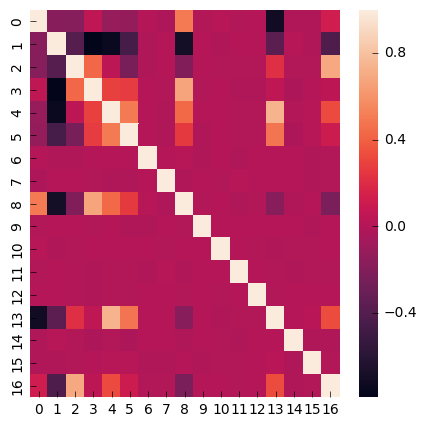

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(5,5))
sns.heatmap(Y)

In [8]:
import numpy as np
import _pickle as cPickle


# In[23]:

def l0_check(a: np.array):
    b = np.array(a)
    for i in range(len(b)):
        if (b[i] != 0):
            b[i] = 1
    return b


# In[24]:

FILE_FOR_MODEL = "05_class_Logistic_regression_model.txt"
class LogisticRegression:
    def __init__(self, alpha: float, l0: float, l1: float, l2: float, 
                 stop_iter: float, stop_delta: float, verbose: bool, model: object):
        '''
        Linerar Regression object constructor
        
        :param alpha: alpha param for gradient descent
        :param l0: L0 regularization coefficient
        :param l1: L1 regularization coefficient
        :param l2: L2 regularization coefficient
        :param stop_iter: maximum iterations of traing
        :param stop_delta: stop iteration delta
        :param verbose: show verbose information
        :param model: get params from other model
        '''
        if (model == None):
            self.alpha = alpha
            self.l0 = l0
            self.l1 = l1
            self.l2 = l2
            self.stop_iter = stop_iter
            self.stop_delta = stop_delta
            self.verbose = verbose
            self.model = model
        else:            
            self.alpha = model['alpha']
            self.l0 = model['l0']
            self.l1 = model['l1']
            self.l2 = model['l2']
            self.stop_iter = model['stop_iter']
            self.stop_delta = model['stop_delta']
            self.verbose = model['verbose']
            self.model = model['model']
    
    def train(self, X: np.array, y: np.array, warm_start: bool):
        '''
        Fit Linear Regression params
        
        :param X: training data
        :param y: training ansewers
        :param warm_start: must be set True to continue training, false to reset params
        '''

        if (warm_start == False):
            self.w = np.random.rand(len(X[0]))
        else:
            file = open(FILE_FOR_MODEL, 'rb')
            self.w = cPickle.load(file)
            file.close()
            
        indicator_for_cycle_exit_criterion = 1   
        
        for j in range(int(self.stop_iter)):
            
            grad = X.T.dot(y-1/(1+np.exp(X.dot(self.w.T))))/len(y) + self.l0*l0_check(self.w) + self.l1*np.sign(self.w) + self.l2*2*self.w
            self.w = self.w - self.alpha*grad
            j += 1
            
            if (self.verbose == True):
                if (j % 100000 == 0):
                    print('iteration = ', j)
                    print('vect =', self.w)
                    print('grad =', grad)
                    print('|grad| =', np.linalg.norm(grad))
            
            if(np.linalg.norm(grad) < self.stop_delta):
                indicator_for_cycle_exit_criterion = 0   
                print('|grad| < stop_delta')
                break
                
        if (indicator_for_cycle_exit_criterion):
            print(self.stop_iter, 'iterations done')
        
        file = open(FILE_FOR_MODEL, 'wb')
        cPickle.dump(self.w, file)
        file.close()
        print('train results saved in', FILE_FOR_MODEL)
            
    
    def get_params(self) -> dict:
        '''
        Return model params
        
        :return: dict of model params
        '''
        dict_params = {}
        dict_params['alpha'] = self.alpha
        dict_params['l0'] = self.l0
        dict_params['l1'] = self.l1
        dict_params['l2'] = self.l2
        dict_params['stop_iter'] = self.stop_iter
        dict_params['stop_delta'] = self.stop_delta
        dict_params['verbose'] = self.verbose
        dict_params['model'] = self.model
        return dict_params
    
    def predict(self, X: np.array) -> np.array:
        file = open(FILE_FOR_MODEL, 'rb')
        self.w = cPickle.load(file)
        file.close()
        '''
        Predit answers on given data
        
        :param X: data
        :return: predicted answers
        '''
        return 1/(1+np.exp(X.dot(self.w.T)))
    
    def test(self, X: np.array, y: np.array, metric=None) -> float:
        file = open(FILE_FOR_MODEL, 'rb')
        self.w = cPickle.load(file)
        file.close()
        '''
        Test the model
        
        :param X: test data
        :param y: test answers
        :param metric: must be a function of 2 numpy arrays. If None, MSE is used.
        :return: metric value
        '''
        return (1/(1+np.exp(X.dot(self.w.T))) - y).dot((1/(1+np.exp(X.dot(self.w.T))) - y).T)/len(y)


In [59]:
import importlib
import class_Logistic_regression
importlib.reload(class_Logistic_regression)
from class_Logistic_regression import LogisticRegression

In [104]:
lr = LogisticRegression(alpha=1e-3, l0=0., l1=0, l2=0, stop_iter=1e5, stop_delta=1e-16, verbose=True, model=None)

In [105]:
lr.train(X=np.delete(X, np.s_[:2000], axis=0), y=np.delete(y, np.s_[:2000], axis=0), warm_start=True)

iteration =  10000
vect = [  5.28456644e-01   7.40979647e-01   9.84453837e-03   1.45510571e-01
   8.17562330e-03  -3.49497486e-01  -3.04083847e-04  -4.24859300e-02
   5.68303573e-01   3.16873594e-02   1.54936844e-02   3.09355368e-02
  -5.54801375e-02   4.35718852e-01  -4.21310709e-02  -4.90427276e-02
   5.28033618e-01]
grad = [ -9.45473033e-13  -5.55466784e-14   4.59352778e-13   2.51503796e-12
  -3.89865207e-12   6.20025720e-12   6.26289598e-12  -2.28027774e-12
  -1.53822022e-12   5.09756992e-12  -7.16866921e-12   1.99563477e-12
   1.54031798e-12  -1.13440279e-12  -1.80662951e-12   5.95272454e-12
   6.36363406e-13]
|grad| = 1.52311063162e-11
iteration =  20000
vect = [  5.28456644e-01   7.40979647e-01   9.84453837e-03   1.45510571e-01
   8.17562331e-03  -3.49497486e-01  -3.04083876e-04  -4.24859300e-02
   5.68303573e-01   3.16873594e-02   1.54936845e-02   3.09355368e-02
  -5.54801375e-02   4.35718852e-01  -4.21310709e-02  -4.90427276e-02
   5.28033618e-01]
grad = [ -1.56374469e-13  -6.

In [106]:
P = lr.predict(X=np.delete(X, np.s_[8000:], axis=0))

In [107]:
print('lenP=', len(P))
print(len(X))
for i in range(len(P)):
    if (P[i] >0.5):
        P[i]=1
    else:
        P[i]=0
print(P)

lenP= 4000
4000
[ 0.  1.  1. ...,  1.  0.  0.]


In [108]:
yy = np.delete(y, np.s_[8000:], axis=0)
j = 0
for i in range(len(P)):
    if (abs(P[i]-yy[i]) > 0):
        j+=1

In [109]:
print(j)
print(len(P))

1423
4000


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [33]:
lr2 = SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=True, max_iter=-1, decision_function_shape='ovr', random_state=None)

In [36]:
X_tr=np.delete(X, np.s_[:2000], axis=0)
y_tr=np.delete(y, np.s_[:2000], axis=0)
lr2.fit(X_tr, y_tr)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [38]:
X_pr=np.delete(X, np.s_[8000:], axis=0)
y_pr= lr2.predict(X_pr)

In [40]:
yy = np.delete(y, np.s_[8000:], axis=0)
j = 0
for i in range(len(y_pr)):
    if (abs(y_pr[i]-yy[i]) > 0):
        j+=1

In [43]:
print(j)
print(len(y_pr))

2009
4000
